## Importação das bibliotecas

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

## Alterando parâmetros default da matplotlib

In [37]:
plt.rcParams['figure.figsize'] = (10, 7) #(width,height)
plt.rcParams['axes.grid'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['savefig.format']: 'pdf'

## Função que calcula a regressão linear utilizando matrizes

In [38]:
def linear_regression(num_it, alpha, theta):
    err = np.zeros(num_it)
    for i in range(num_it):
        h = np.dot(X,theta)
        e = h-y
        J = (np.dot(e.T,e)/(2*m))
        err[i] = J
        theta = theta - ((alpha/m)*np.dot(X.T,e))
    return err, theta

## Definição das variáveis e criação do diretório das imagens

In [39]:
if not os.path.exists(os.path.join('..','imgs')):
    os.makedirs(os.path.join('..','imgs'))
x = np.loadtxt('../inputs/entradas_x.txt')
y = np.loadtxt('../inputs/saidas_y.txt')
m = len(x)
x = x.reshape(m,1)
y = y.reshape(m,1)

X = np.ones((len(x),2))
X[:,-1:] = x
initial_theta = np.array([0,0]).reshape(2,1)

NUM_IT = 100

### Primeiros insights com valores iniciais de $\theta$ e $\alpha$

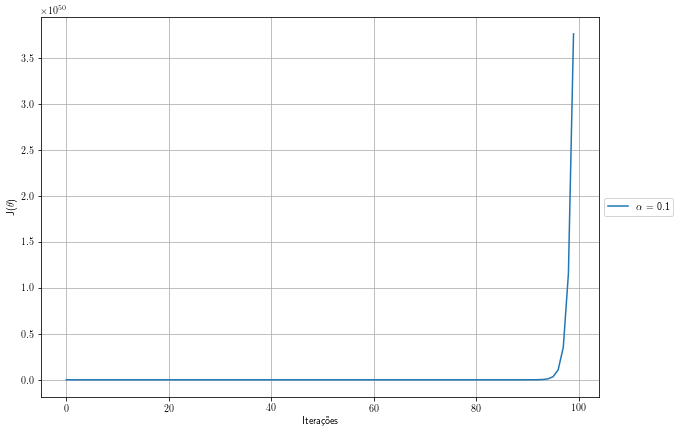

In [40]:
err, theta = linear_regression(num_it=NUM_IT, alpha=0.1, theta=initial_theta)
plt.plot(range(NUM_IT),err, label=r'$\alpha$ = 0.1')
plt.xlabel('Iterações')
plt.ylabel(r'J($\theta$)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'first_insight', bbox_inches='tight')

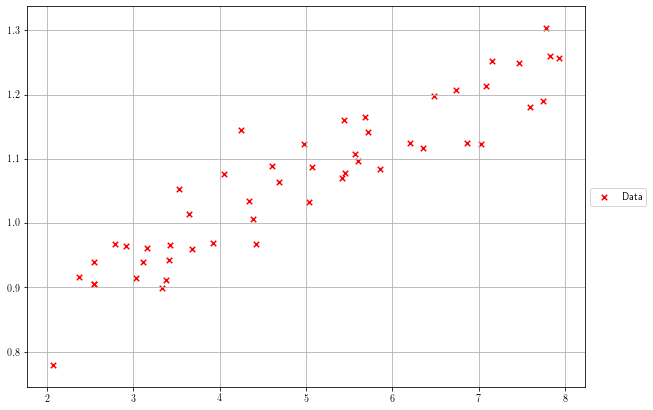

In [41]:
plt.scatter(x,y, label= 'Data', s=30, marker='x', c='r')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'data', bbox_inches='tight')

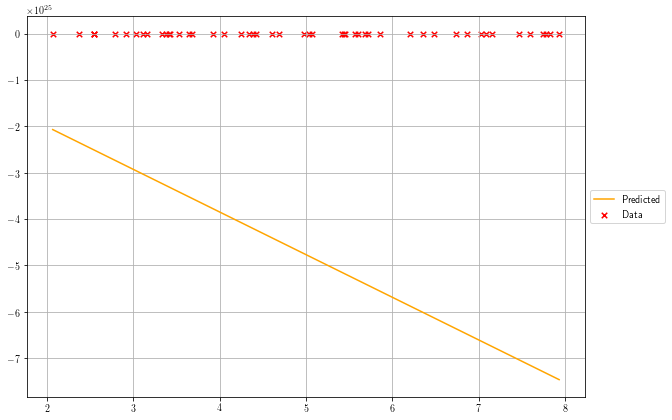

In [42]:
plt.scatter(x,y, label= 'Data', s=30, marker='x', c='r')
plt.plot(x, [theta[0]+(theta[1]*i) for i in x], label= 'Predicted', c='orange')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'first_predicted', bbox_inches='tight')

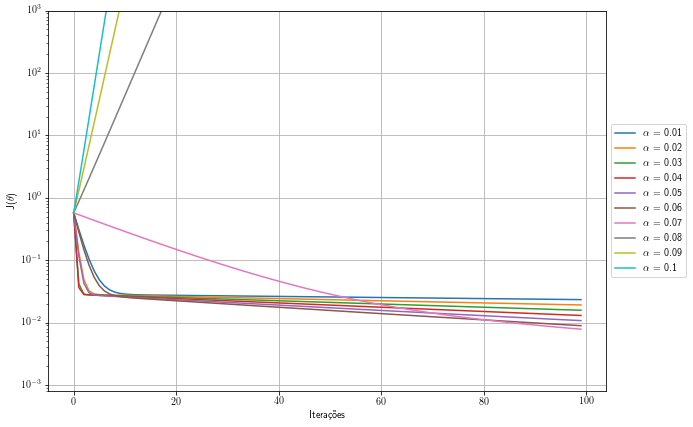

In [43]:
plt.yscale('log')
alpha_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,0.08,0.09,0.1]
theta_values = {}
err_values = {}

for alpha in alpha_values:
    err, theta = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
    theta_values[alpha] = theta
    err_values[alpha] = err
    plt.plot(range(NUM_IT), err, label=fr'$\alpha$ = {alpha}')
plt.xlabel('Iterações')
plt.ylabel(r'J($\theta$)')    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.axis(ymax=10e2,ymin=8e-4)
plt.savefig(os.path.join('..','imgs/')+'overflow_insights', bbox_inches='tight')

---

# Learning Rate - 100 Iterações

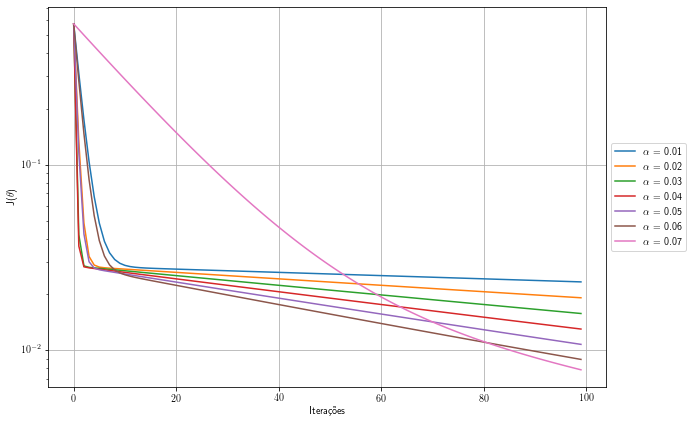

In [44]:
plt.yscale('log')
alpha_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
theta_values = {}
err_values = {}

for alpha in alpha_values:
    err, theta = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
    theta_values[alpha] = theta
    err_values[alpha] = err
    plt.plot(range(NUM_IT), err, label=fr'$\alpha$ = {alpha}')
plt.xlabel('Iterações')
plt.ylabel(r'J($\theta$)')    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'lr_100it', bbox_inches='tight')

# Intervalo de menor valor das 100 iterações

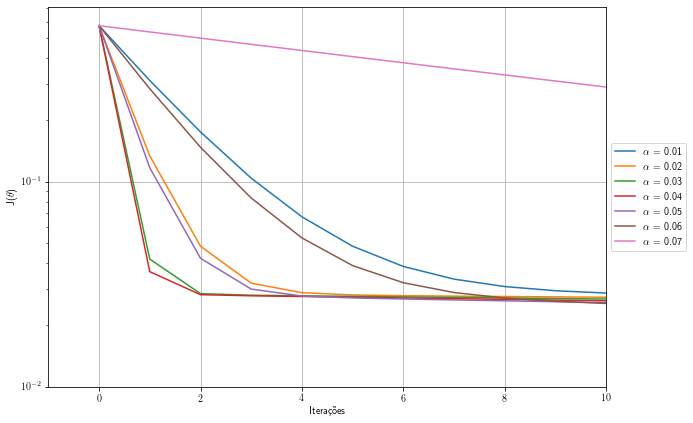

In [45]:
plt.yscale('log')
for alpha,err in err_values.items():
    plt.plot(range(NUM_IT),err, label=fr'$\alpha$ = {alpha}')
plt.axis(xmin=-1,xmax=10,ymin=10e-3)
plt.xlabel('Iterações')
plt.ylabel(r'J($\theta$)')    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'lower_interval', bbox_inches='tight')

# Intervalo de maior valor das 100 iterações

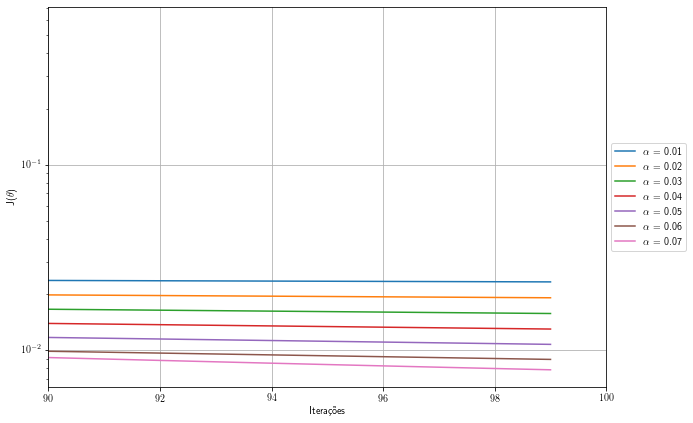

In [46]:
plt.yscale('log')
for alpha,err in err_values.items():
    plt.plot(range(NUM_IT),err, label=fr'$\alpha$ = {alpha}')
plt.axis(xmin=90,xmax=100)
plt.xlabel('Iterações')
plt.ylabel(r'J($\theta$)')    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'higher_interval_100it', bbox_inches='tight')

---

# Learning Rate - 1000 Iterações

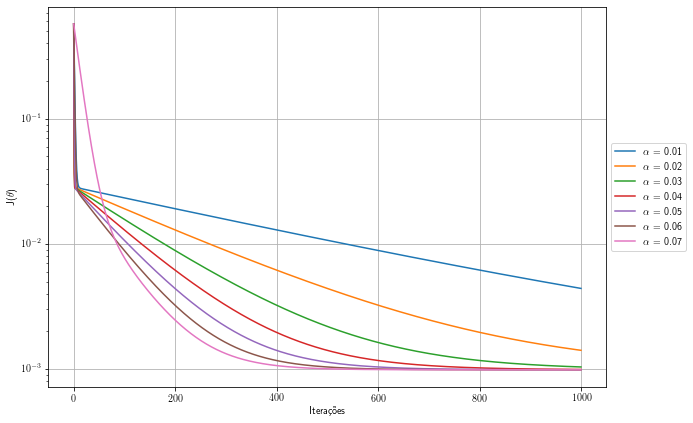

In [47]:
plt.yscale('log')
NUM_IT = 1000

for alpha in alpha_values:
    err, theta = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)
    theta_values[alpha] = theta
    err_values[alpha] = err
    plt.plot(range(NUM_IT), err, label=fr'$\alpha$ = {alpha}')
plt.xlabel('Iterações')
plt.ylabel(r'J($\theta$)')    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'lr_1000it', bbox_inches='tight')

## Intervalo de maior valor das 1000 iterações

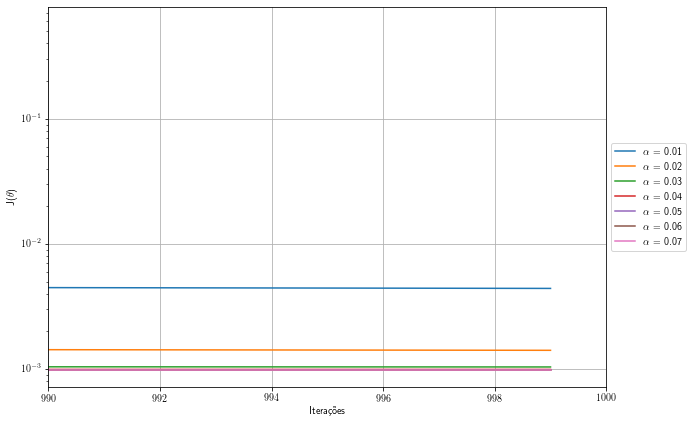

In [94]:
plt.yscale('log')
for alpha,err in err_values.items():
    plt.plot(range(NUM_IT),err, label=fr'$\alpha$ = {alpha}')
plt.axis(xmin=990,xmax=1000)
plt.xlabel('Iterações')
plt.ylabel(r'J($\theta$)')    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'higher_interval_1000it', bbox_inches='tight')

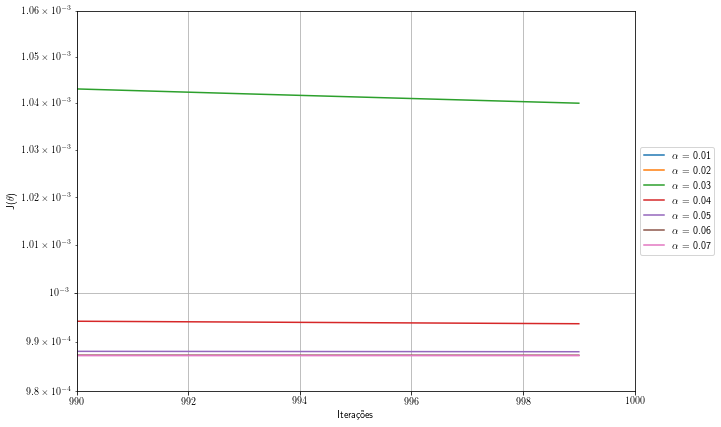

In [97]:
plt.yscale('log')
for alpha,err in err_values.items():
    plt.plot(range(NUM_IT),err, label=fr'$\alpha$ = {alpha}')
plt.axis(xmin=990,xmax=1000, ymax=10.6e-4, ymin=9.8e-4)
plt.xlabel('Iterações')
plt.ylabel(r'J($\theta$)')    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'max_zoom', bbox_inches='tight')

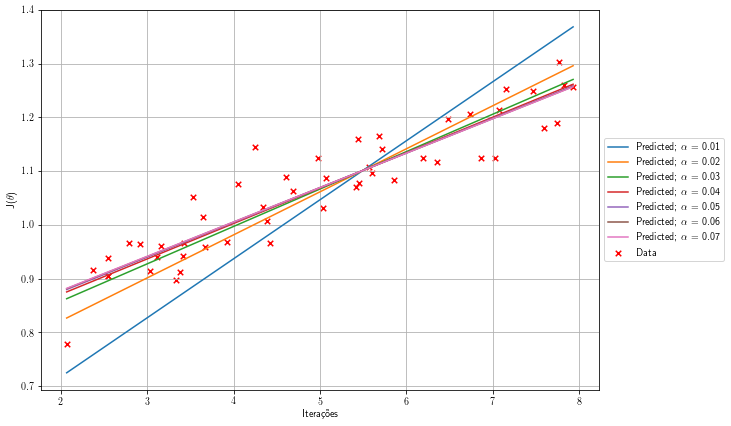

In [14]:
plt.scatter(x,y, label= 'Data', s=30, marker='x', c='r')
for k,v in theta_values.items():
    plt.plot(x, [v[0]+(v[1]*i) for i in x], label= r'Predicted; $\alpha$ = '+str(k))
plt.xlabel('Iterações')
plt.ylabel(r'J($\theta$)')    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'all_predictions', bbox_inches='tight')

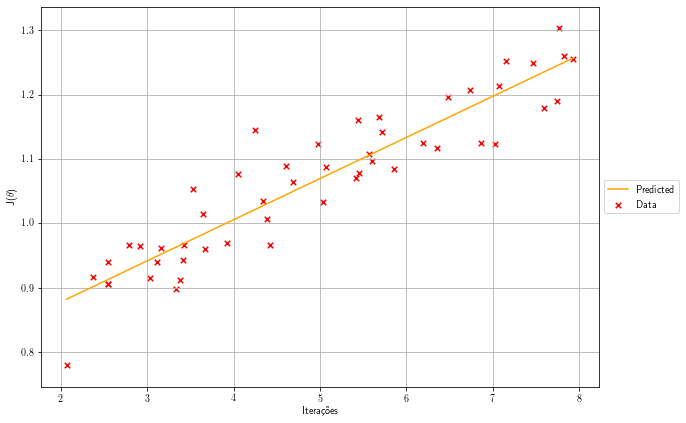

In [15]:
alpha = 0.07
_, new_theta = linear_regression(num_it=NUM_IT, alpha=alpha, theta=initial_theta)

plt.scatter(x,y, label= 'Data', s=30, marker='x', c='r')
plt.plot(x, [new_theta[0]+(new_theta[1]*i) for i in x], label= 'Predicted', c='orange')
plt.xlabel('Iterações')
plt.ylabel(r'J($\theta$)')    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig(os.path.join('..','imgs/')+'FINAL_predicted', bbox_inches='tight')